In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/click-through-rate-prediction/ad_10000records.csv


In [12]:
df = pd.read_csv("/kaggle/input/click-through-rate-prediction/ad_10000records.csv")

In [3]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [6]:
len(df)

10000

In [7]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

df.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Hour,Day,Month,Year
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0,21,9,6,2016
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0,17,16,1,2016
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0,10,29,6,2016
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0,14,21,6,2016
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1,10,21,7,2016


In [14]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Country', 'City'], drop_first=True)

df_encoded.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Timestamp,Clicked on Ad,Hour,Day,Month,...,City_Williamsmouth,City_Williamsport,City_Williamsside,City_Wilsonburgh,City_Wintersfort,City_Wrightburgh,City_Yangside,City_Youngburgh,City_Youngfort,City_Zacharyton
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,2016-06-09 21:43:05,0,21,9,6,...,False,False,False,False,False,False,False,False,False,False
1,41.73,31.0,61840.26,207.17,Optional full-range projection,2016-01-16 17:56:05,0,17,16,1,...,False,False,False,False,False,False,False,False,False,False
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,2016-06-29 10:50:45,0,10,29,6,...,False,False,False,False,False,False,False,False,False,False
3,59.88,28.0,56180.93,207.17,Balanced empowering success,2016-06-21 14:32:32,0,14,21,6,...,False,False,False,False,False,False,False,False,False,False
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,2016-07-21 10:54:35,1,10,21,7,...,False,False,False,False,False,False,False,False,False,False


In [11]:
len(df_encoded.columns)

738

In [15]:
df_encoded = df_encoded.drop(['Ad Topic Line', 'Timestamp'], axis=1)

X = df_encoded.drop('Clicked on Ad', axis=1)
y = df_encoded['Clicked on Ad']

X.head(), y.head()


(   Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  Hour  \
 0                     62.26  32.0     69481.85                172.83    21   
 1                     41.73  31.0     61840.26                207.17    17   
 2                     44.40  30.0     57877.15                172.83    10   
 3                     59.88  28.0     56180.93                207.17    14   
 4                     49.21  30.0     54324.73                201.58    10   
 
    Day  Month  Year  Gender_Male  Country_Albania  ...  City_Williamsmouth  \
 0    9      6  2016         True            False  ...               False   
 1   16      1  2016         True            False  ...               False   
 2   29      6  2016        False            False  ...               False   
 3   21      6  2016        False            False  ...               False   
 4   21      7  2016        False            False  ...               False   
 
    City_Williamsport  City_Williamsside  City_W

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

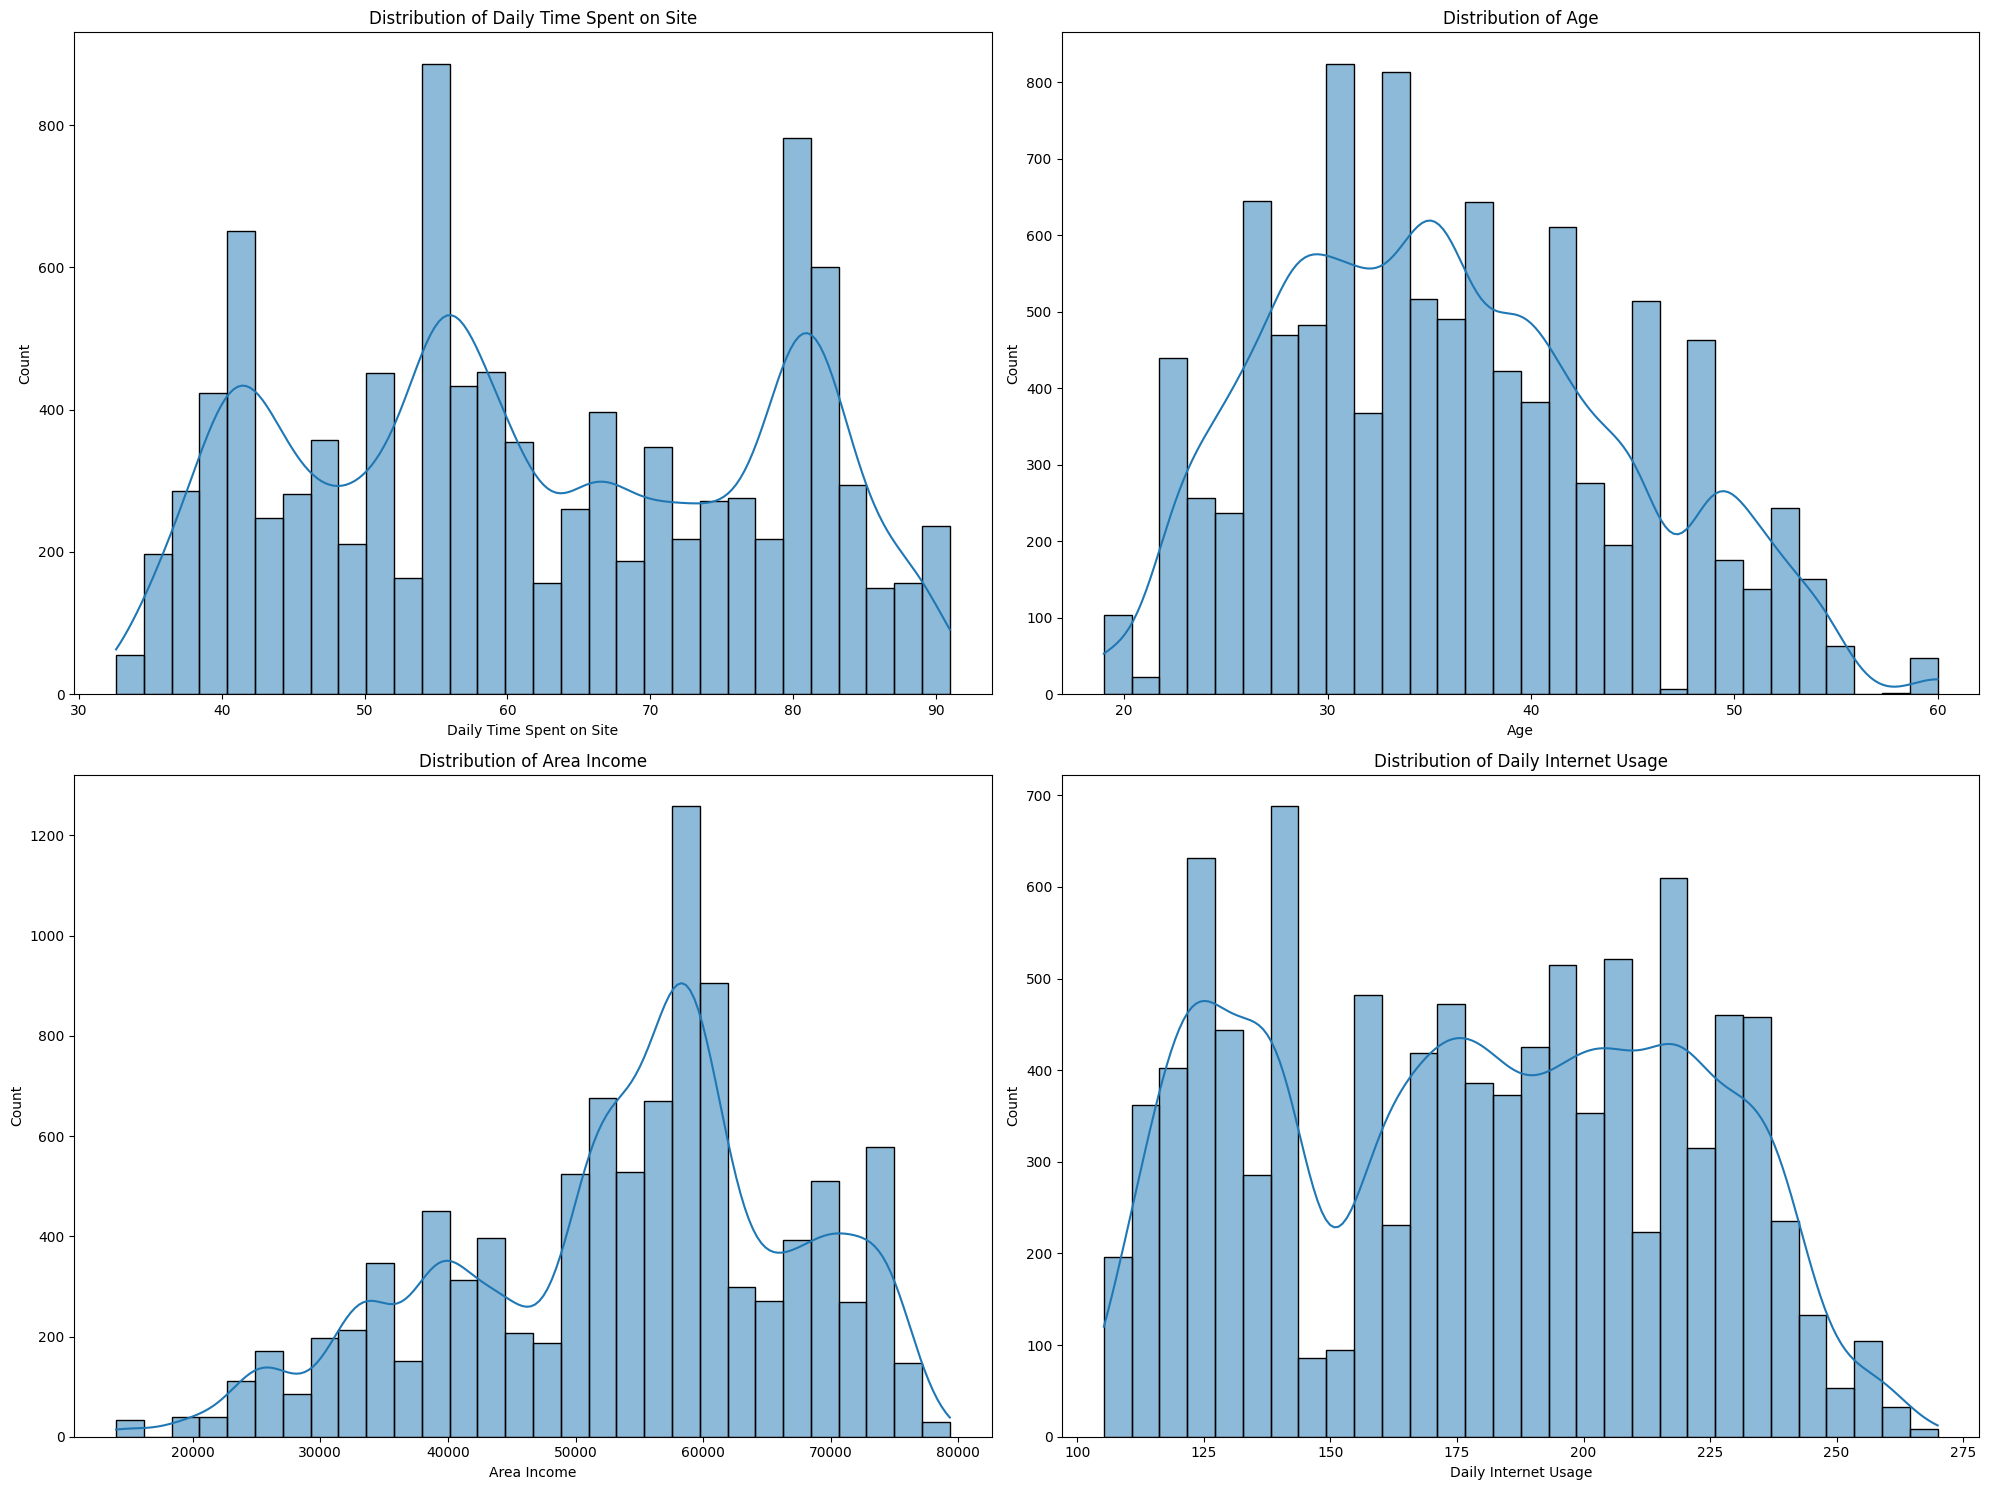

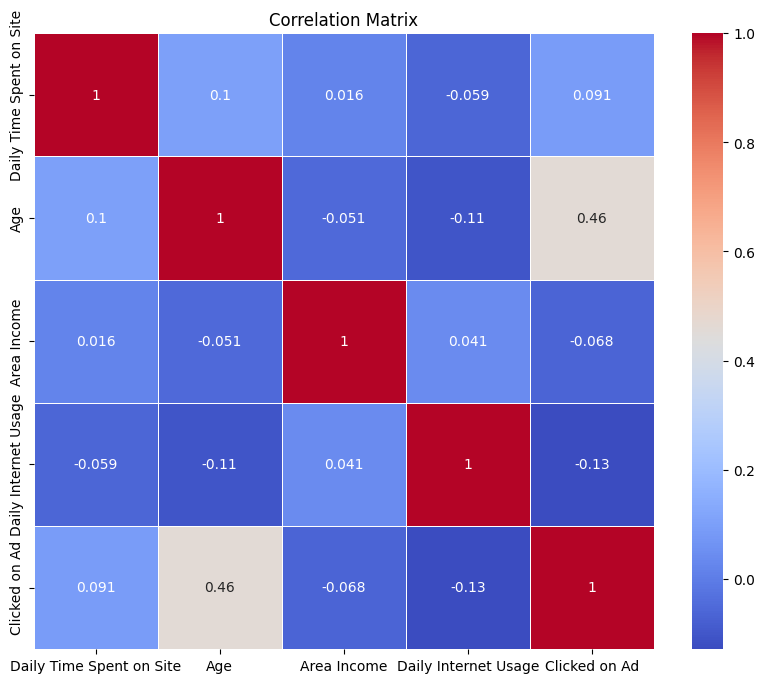

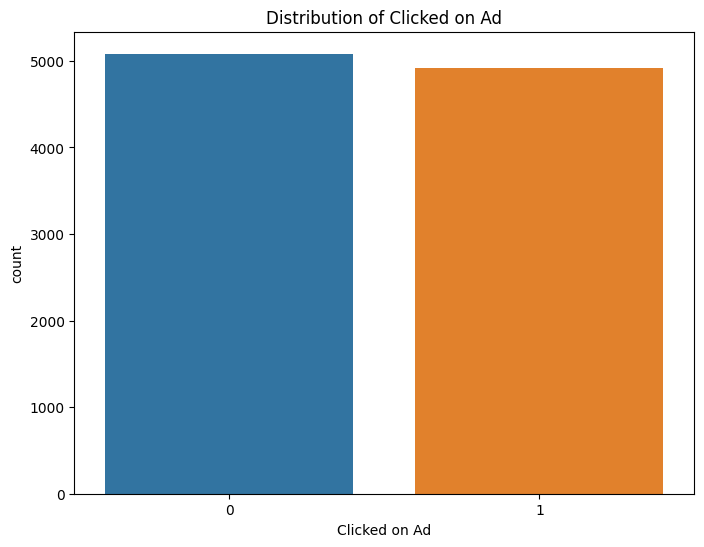

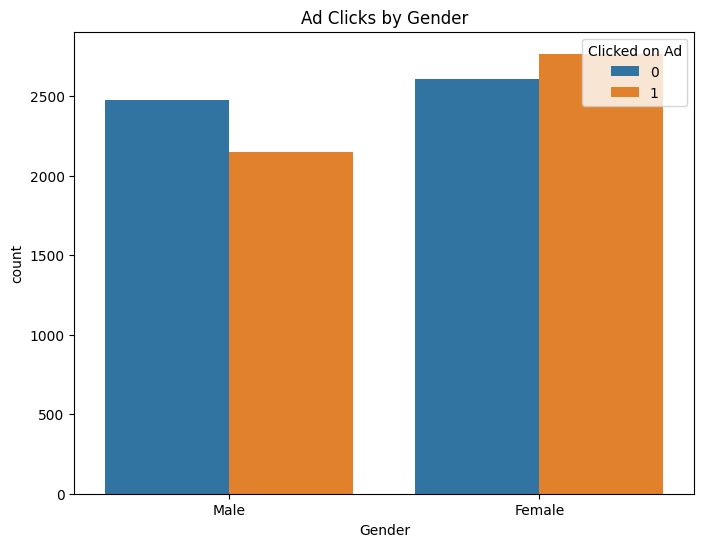

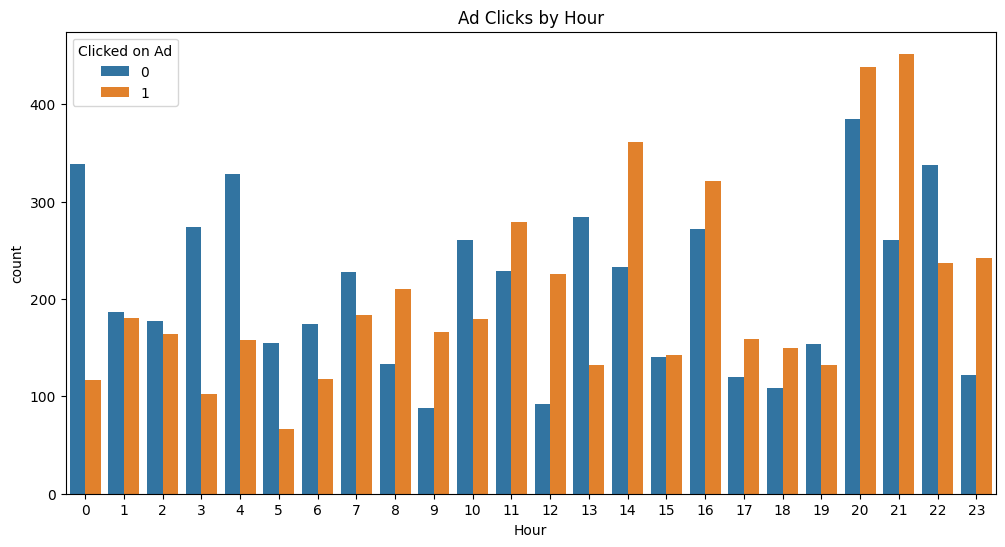

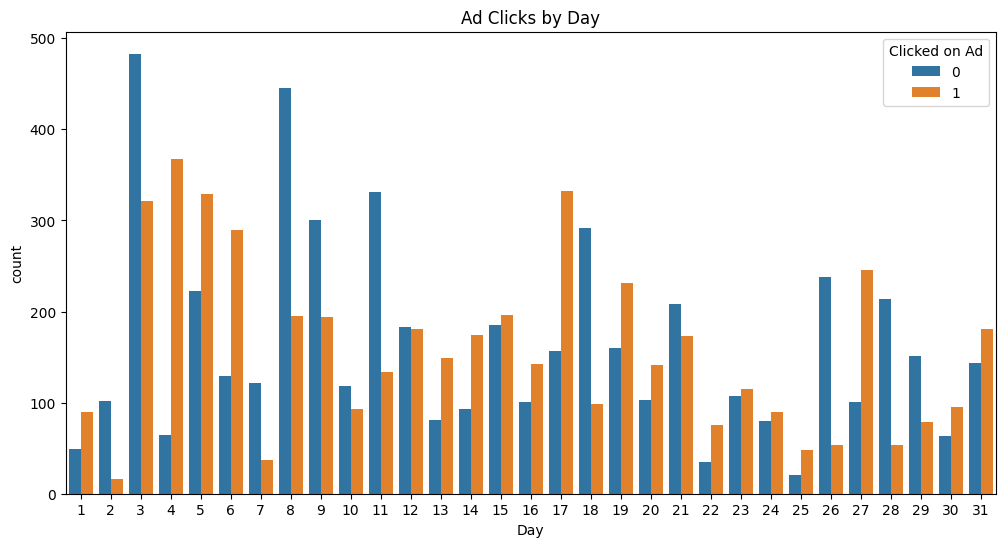

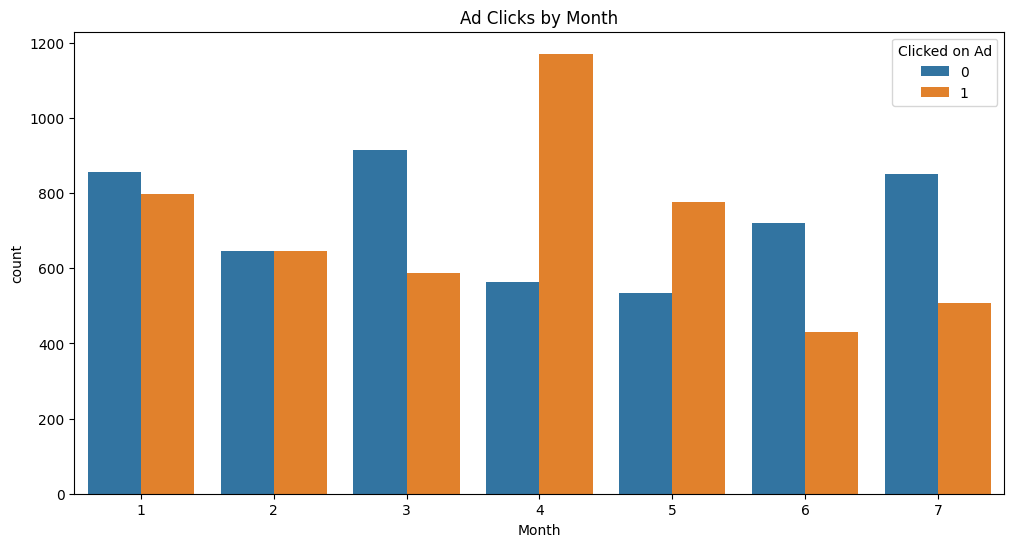

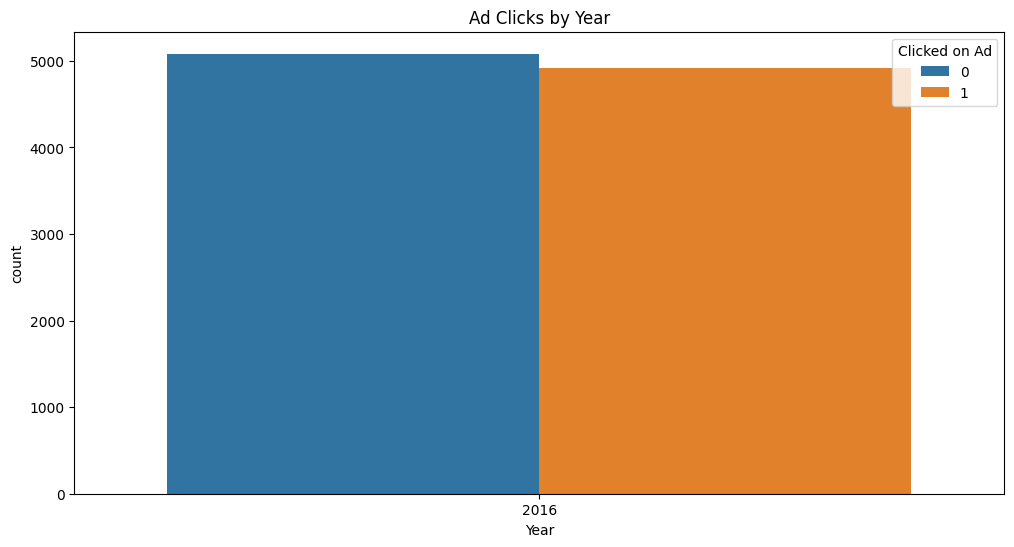

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_features + ['Clicked on Ad']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Clicked on Ad', data=df)
plt.title('Distribution of Clicked on Ad')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Clicked on Ad', data=df)
plt.title('Ad Clicks by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', hue='Clicked on Ad', data=df)
plt.title('Ad Clicks by Hour')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Day', hue='Clicked on Ad', data=df)
plt.title('Ad Clicks by Day')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Clicked on Ad', data=df)
plt.title('Ad Clicks by Month')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Clicked on Ad', data=df)
plt.title('Ad Clicks by Year')
plt.show()



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((8000, 735), (2000, 735), (8000,), (2000,))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

importances = rf_clf.feature_importances_
indices = np.argsort(importances)[-50:]

X_train_reduced = X_train_scaled[:, indices]
X_test_reduced = X_test_scaled[:, indices]

models = {'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
          'Random Forest': RandomForestClassifier(random_state=42),
          'Gradient Boosting': GradientBoostingClassifier(random_state=42)}
results_reduced = {}

for model_name, model in models.items():
    model.fit(X_train_reduced, y_train)
    
    y_pred = model.predict(X_test_reduced)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_train_reduced, y_train, cv=5, scoring='accuracy')
    
    results_reduced[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Cross-Validation Mean Accuracy': cv_scores.mean()
    }

    
print(pd.DataFrame(results_reduced).T)


                     Accuracy  Precision    Recall  F1 Score  \
Logistic Regression    0.8315   0.850811  0.798174  0.823653   
Random Forest          0.8600   0.868476  0.843813  0.855967   
Gradient Boosting      0.8230   0.851111  0.776876  0.812301   

                     Cross-Validation Mean Accuracy  
Logistic Regression                        0.820500  
Random Forest                              0.848750  
Gradient Boosting                          0.808875  


In [9]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 100, num=10)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_clf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid, 
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train_reduced, y_train)

best_params = rf_random.best_params_
best_params


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': None}

In [10]:
optimized_rf_clf = RandomForestClassifier(**best_params, random_state=42)

optimized_rf_clf.fit(X_train_reduced, y_train)

y_pred_optimized = optimized_rf_clf.predict(X_test_reduced)

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

cv_scores_optimized = cross_val_score(optimized_rf_clf, X_train_reduced, y_train, cv=3, scoring='accuracy')

optimized_results = {
    'Accuracy': accuracy_optimized,
    'Precision': precision_optimized,
    'Recall': recall_optimized,
    'F1 Score': f1_optimized,
    'Cross-Validation Mean Accuracy': cv_scores_optimized.mean()
}

print("Optimized Model Evaluation Results")
for metric, value in optimized_results.items():
    print(f"{metric}: {value:.4f}")

Optimized Model Evaluation Results
Accuracy: 0.8680
Precision: 0.8714
Recall: 0.8590
F1 Score: 0.8652
Cross-Validation Mean Accuracy: 0.8499
